# Fundamentos de estadística para Analítica de Datos





## Umbrales de correlación

1. Un coeficiente C de contigencia, entre variables nominaes:
* Toma valores entre 0 y 1
* 0 implica ausencia total de relación, es decir, las dos variables son independientes. 
* Se considera alto después de 0.5 (Entre más datos se tengas, más dificil es obtener relaciones altas)

2. Para el coeficiente de correlación de Pearson, entre dos variables cuantitativas.
* Toma valores entre -1 y 1
* Para analizar la magnitud de la correlación, una estrategía es elevarlo al cuadrado, porque este valor significa la información que comparten las dos variables de manera lineal. Por ejemplo si la correlación es -0.7, al cuadrado vale 0.49 (49%). Implica que el 49% de la información de las variables es compartida.
* Se considera alto cuando está: a) mayor a 0.7 o menor a -0.7.
* Siempre deben graficarse lo datos antes, para poder ver las posibles relaciones.
* En caso de tener datos atípicos o asimetrias , use el coeficiente de correlación de Spearman. (Acá)[https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Spearman)

```
datos.corr(method="spearman")
```
* El coeficiente de correlación de Spearman o de Kendall no deben elevarse al cuadrado.

3. Para el coeficiente de correlación de Kendall, entre dos variables cualitativas ordinales. 

* Toma valores entre -1 y 1
* Para analizar la magnitud de la correlación, una estrategía es elevarlo al cuadrado, porque este valor significa la información que comparten las dos variables de manera lineal. 
* Se considera alto cuando está: a) mayor a 0.6 o menor a -0.6.
* Siempre deben graficarse lo datos antes, para poder ver las posibles relaciones. (Gráficos de contingencia)

## Otras gráficas multivariadas

In [2]:
## Pandas datafrmaes y variables
import pandas as pd
## Numerical Python
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats

## Carga de datos

Primero vamos a cargar la hoja de datos de la prueba [SABER 11](https://www.datos.gov.co/Educaci-n/Saber-11-2019-2/ynam-yc42 ) del año 2019.

In [3]:
datos = pd.read_csv("/content/drive/MyDrive/2023/Fundamentos de Estadistica/Hojas de datos/Saber_11__2019-2.csv", na_values="-", index_col=5)
datos

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,ESTU_DEPTO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
ESTU_CONSECUTIVO,,,,,,,,,,,,,,,,,,,,,
SB11201940031558,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,20194,ESTUDIANTE,No,COLOMBIA,NaN,MAGDALENA,...,54.0,67,A1,208,25.0,50.942156,2.0,2.0,PUBLICAR,NO
SB11201940303339,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,20194,ESTUDIANTE,No,COLOMBIA,NaN,BOGOTÁ,...,63.0,88,A2,299,83.0,59.767864,3.0,4.0,PUBLICAR,NO
SB11201940255017,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,20194,ESTUDIANTE,No,COLOMBIA,NaN,BOLIVAR,...,64.0,89,A2,299,84.0,50.764238,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
SB11201940154799,TI,COLOMBIA,M,04/26/2002 12:00:00 AM,20194,ESTUDIANTE,Si,COLOMBIA,Ninguno,BOGOTÁ,...,53.0,67,A1,309,88.0,45.779135,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
SB11201940280831,TI,COLOMBIA,M,02/05/2002 12:00:00 AM,20194,ESTUDIANTE,No,COLOMBIA,NaN,BOGOTÁ,...,52.0,63,A1,288,78.0,52.910946,3.0,3.0,PUBLICAR,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SB11201940195862,CC,COLOMBIA,M,02/25/1999 12:00:00 AM,20194,ESTUDIANTE,No,COLOMBIA,NaN,ANTIOQUIA,...,58.0,79,A2,360,99.0,47.580772,2.0,2.0,PUBLICAR,GENERACION E - EXCELENCIA NACIONAL
SB11201940253002,TI,COLOMBIA,M,10/14/2002 12:00:00 AM,20194,ESTUDIANTE,No,COLOMBIA,NaN,BOGOTÁ,...,74.0,97,B1,360,99.0,57.406418,3.0,4.0,PUBLICAR,GENERACION E - EXCELENCIA NACIONAL
SB11201940364767,TI,COLOMBIA,M,11/22/2002 12:00:00 AM,20194,ESTUDIANTE,No,COLOMBIA,NaN,ARAUCA,...,72.0,96,B1,377,100.0,71.225431,4.0,3.0,PUBLICAR,GENERACION E - EXCELENCIA DEPARTAMENTAL


In [ ]:
datos.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_ESTUDIANTE', 'ESTU_TIENEETNIA',
       'ESTU_PAIS_RESIDE', 'ESTU_ETNIA', 'ESTU_DEPTO_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR',
       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_ICFES',
      


# Graficos de barras (sunburst)

In [4]:
datosGrafica = datos[[ 'ESTU_GENERO','ESTU_NACIONALIDAD','ESTU_ETNIA',
                       'FAMI_ESTRATOVIVIENDA','COLE_JORNADA']].fillna(value="SinInformacion")
tabla = datosGrafica.groupby([ 'ESTU_GENERO','ESTU_NACIONALIDAD','ESTU_ETNIA',
                       'FAMI_ESTRATOVIVIENDA','COLE_JORNADA'], as_index=False).size()
tabla

,ESTU_GENERO,ESTU_NACIONALIDAD,ESTU_ETNIA,FAMI_ESTRATOVIVIENDA,COLE_JORNADA,size
0,F,ALBANIA,SinInformacion,Sin Estrato,SABATINA,1
1,F,ARGENTINA,SinInformacion,Estrato 2,NOCHE,1
2,F,ARGENTINA,SinInformacion,Estrato 3,COMPLETA,1
3,F,ARGENTINA,SinInformacion,Estrato 5,MAÑANA,1
4,F,ARGENTINA,SinInformacion,Estrato 6,MAÑANA,1
...,...,...,...,...,...,...
1389,SinInformacion,COLOMBIA,SinInformacion,Sin Estrato,MAÑANA,2
1390,SinInformacion,COLOMBIA,SinInformacion,Sin Estrato,TARDE,1
1391,SinInformacion,COLOMBIA,SinInformacion,Sin Estrato,UNICA,3
1392,SinInformacion,COLOMBIA,SinInformacion,SinInformacion,MAÑANA,7


In [5]:
fig = px.sunburst(tabla, path=['ESTU_GENERO','ESTU_NACIONALIDAD','ESTU_ETNIA',
                       'FAMI_ESTRATOVIVIENDA','COLE_JORNADA'], values='size')
fig.show()

## Graficos de dispersión 

In [6]:
datosDepto = datos.groupby(['COLE_NATURALEZA', "ESTU_DEPTO_RESIDE"], as_index=False).mean()
datosDepto = datosDepto[['COLE_NATURALEZA', "ESTU_DEPTO_RESIDE",
                         'PUNT_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA',
       'DESEMP_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS',
       'DESEMP_MATEMATICAS', 'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES',
       'DESEMP_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS',
       'PERCENTIL_SOCIALES_CIUDADANAS', 'DESEMP_SOCIALES_CIUDADANAS',
       'PUNT_INGLES', 'PERCENTIL_INGLES', 'PUNT_GLOBAL', 'PERCENTIL_GLOBAL',
       'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL',
       'ESTU_NSE_ESTABLECIMIENTO']]
datosDepto

,COLE_NATURALEZA,ESTU_DEPTO_RESIDE,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,...,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,NO OFICIAL,AMAZONAS,60.928571,75.000000,3.107143,60.857143,76.714286,3.000000,56.107143,72.464286,...,57.892857,76.142857,2.678571,62.714286,82.035714,296.214286,78.464286,61.760467,3.285714,3.392857
1,NO OFICIAL,ANTIOQUIA,53.689251,54.335970,2.713699,50.888942,50.694486,2.433169,48.492654,50.338350,...,48.440010,54.704479,2.050860,52.085063,56.275653,252.545952,52.701327,56.443649,2.846024,2.851007
2,NO OFICIAL,ARAUCA,51.003367,46.410774,2.528620,49.585859,46.979798,2.367003,46.663300,44.767677,...,46.350168,50.121212,1.905724,46.138047,44.306397,241.111111,46.336700,50.905997,2.390244,2.468013
3,NO OFICIAL,ATLANTICO,52.886618,51.870755,2.659747,50.452997,49.388268,2.413499,48.730650,50.770574,...,46.953157,51.228894,1.957628,51.092196,54.720430,249.289897,50.913872,54.481790,2.715080,2.711594
4,NO OFICIAL,BOGOTÁ,57.999764,66.081070,3.000892,57.573895,66.623377,2.825187,54.606795,66.702715,...,53.395146,66.525961,2.365525,58.832113,72.021593,280.599974,68.459898,60.636623,3.191442,3.213302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,OFICIAL,SUCRE,49.675971,43.191815,2.453200,47.699580,42.914586,2.271354,46.593599,45.587618,...,43.018678,42.488982,1.697377,44.213221,40.362644,232.760651,42.345016,44.845265,1.885974,1.856978
64,OFICIAL,TOLIMA,50.690575,45.995642,2.513370,48.945117,46.012483,2.356552,46.828557,46.526887,...,44.709263,46.875092,1.797533,46.235559,45.440242,238.368149,45.808834,47.870732,2.153980,2.136579
65,OFICIAL,VALLE,51.690673,48.991228,2.580511,49.126754,46.645070,2.363636,47.359825,48.000000,...,45.516674,48.745146,1.856589,47.415153,48.283405,241.729507,47.771430,49.575437,2.312864,2.331702
66,OFICIAL,VAUPES,44.725948,29.816327,2.104956,42.271137,29.720117,1.935860,41.440233,31.218659,...,39.419825,33.632653,1.486880,41.516035,33.052478,209.612245,28.822157,39.705995,1.481481,1.373178


In [7]:
fig = px.scatter(datosDepto, x='PUNT_LECTURA_CRITICA', y='PUNT_C_NATURALES', 
                 color='COLE_NATURALEZA', hover_name="ESTU_DEPTO_RESIDE")
fig.show()

In [8]:
datosDepto.corr(method="pearson")

,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
PUNT_LECTURA_CRITICA,1.000000,0.997356,0.986547,0.916169,0.923134,0.934203,0.949159,0.947160,0.929093,0.952731,0.944130,0.960227,0.889433,0.912997,0.984147,0.980707,0.815902,0.839872,0.746125
PERCENTIL_LECTURA_CRITICA,0.997356,1.000000,0.982694,0.895869,0.904113,0.922391,0.951504,0.950654,0.934153,0.960740,0.955201,0.965983,0.896288,0.921720,0.981578,0.982656,0.808833,0.835659,0.735950
DESEMP_LECTURA_CRITICA,0.986547,0.982694,1.000000,0.928117,0.929324,0.955793,0.956758,0.960522,0.939137,0.968120,0.963493,0.970852,0.914332,0.929138,0.992572,0.990365,0.812279,0.831457,0.729155
PUNT_MATEMATICAS,0.916169,0.895869,0.928117,1.000000,0.993830,0.986121,0.864695,0.868676,0.827636,0.846184,0.833730,0.860764,0.774125,0.788612,0.931165,0.914617,0.710578,0.727467,0.626441
PERCENTIL_MATEMATICAS,0.923134,0.904113,0.929324,0.993830,1.000000,0.982095,0.886799,0.890141,0.855736,0.856365,0.841706,0.872598,0.792217,0.805479,0.940295,0.925115,0.721800,0.725376,0.648883
DESEMP_MATEMATICAS,0.934203,0.922391,0.955793,0.986121,0.982095,1.000000,0.908456,0.917179,0.877115,0.892909,0.889380,0.898893,0.824798,0.839820,0.957917,0.951653,0.707052,0.724220,0.616281
PUNT_C_NATURALES,0.949159,0.951504,0.956758,0.864695,0.886799,0.908456,1.000000,0.997332,0.994922,0.965722,0.959109,0.965436,0.909522,0.918116,0.976781,0.978031,0.735195,0.727410,0.663487
PERCENTIL_C_NATURALES,0.947160,0.950654,0.960522,0.868676,0.890141,0.917179,0.997332,1.000000,0.993220,0.969138,0.966295,0.966615,0.911759,0.921916,0.977902,0.983018,0.724436,0.719477,0.649657
DESEMP_C_NATURALES,0.929093,0.934153,0.939137,0.827636,0.855736,0.877115,0.994922,0.993220,1.000000,0.967217,0.959965,0.966354,0.920139,0.924731,0.963403,0.966853,0.734755,0.719424,0.668295
PUNT_SOCIALES_CIUDADANAS,0.952731,0.960740,0.968120,0.846184,0.856365,0.892909,0.965722,0.969138,0.967217,1.000000,0.997194,0.997664,0.930764,0.939624,0.975971,0.981685,0.782522,0.795021,0.695137


### Podemos hacer los puntos proporcionales al tamaño del depto



In [9]:
conteosDepto = datos.groupby(['COLE_NATURALEZA', "ESTU_DEPTO_RESIDE"], as_index=False).size()
conteosDepto

,COLE_NATURALEZA,ESTU_DEPTO_RESIDE,size
0,NO OFICIAL,AMAZONAS,28
1,NO OFICIAL,ANTIOQUIA,16811
2,NO OFICIAL,ARAUCA,297
3,NO OFICIAL,ATLANTICO,9393
4,NO OFICIAL,BOGOTÁ,38115
...,...,...,...
63,OFICIAL,SUCRE,9530
64,OFICIAL,TOLIMA,13538
65,OFICIAL,VALLE,30437
66,OFICIAL,VAUPES,343


In [10]:
datosDepto

,COLE_NATURALEZA,ESTU_DEPTO_RESIDE,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,...,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,NO OFICIAL,AMAZONAS,60.928571,75.000000,3.107143,60.857143,76.714286,3.000000,56.107143,72.464286,...,57.892857,76.142857,2.678571,62.714286,82.035714,296.214286,78.464286,61.760467,3.285714,3.392857
1,NO OFICIAL,ANTIOQUIA,53.689251,54.335970,2.713699,50.888942,50.694486,2.433169,48.492654,50.338350,...,48.440010,54.704479,2.050860,52.085063,56.275653,252.545952,52.701327,56.443649,2.846024,2.851007
2,NO OFICIAL,ARAUCA,51.003367,46.410774,2.528620,49.585859,46.979798,2.367003,46.663300,44.767677,...,46.350168,50.121212,1.905724,46.138047,44.306397,241.111111,46.336700,50.905997,2.390244,2.468013
3,NO OFICIAL,ATLANTICO,52.886618,51.870755,2.659747,50.452997,49.388268,2.413499,48.730650,50.770574,...,46.953157,51.228894,1.957628,51.092196,54.720430,249.289897,50.913872,54.481790,2.715080,2.711594
4,NO OFICIAL,BOGOTÁ,57.999764,66.081070,3.000892,57.573895,66.623377,2.825187,54.606795,66.702715,...,53.395146,66.525961,2.365525,58.832113,72.021593,280.599974,68.459898,60.636623,3.191442,3.213302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,OFICIAL,SUCRE,49.675971,43.191815,2.453200,47.699580,42.914586,2.271354,46.593599,45.587618,...,43.018678,42.488982,1.697377,44.213221,40.362644,232.760651,42.345016,44.845265,1.885974,1.856978
64,OFICIAL,TOLIMA,50.690575,45.995642,2.513370,48.945117,46.012483,2.356552,46.828557,46.526887,...,44.709263,46.875092,1.797533,46.235559,45.440242,238.368149,45.808834,47.870732,2.153980,2.136579
65,OFICIAL,VALLE,51.690673,48.991228,2.580511,49.126754,46.645070,2.363636,47.359825,48.000000,...,45.516674,48.745146,1.856589,47.415153,48.283405,241.729507,47.771430,49.575437,2.312864,2.331702
66,OFICIAL,VAUPES,44.725948,29.816327,2.104956,42.271137,29.720117,1.935860,41.440233,31.218659,...,39.419825,33.632653,1.486880,41.516035,33.052478,209.612245,28.822157,39.705995,1.481481,1.373178


## ¿Cómo unir dataframes?

1. Leer [esto](https://pandas.pydata.org/docs/user_guide/merging.html)
2. Unir bases de datos

In [11]:
dataA= pd.DataFrame({"Nombre":["A1", "A2", "A3", "A4"], "Edad":[12,15,16,18],
                     "Mascotas":[1,2,3,0], "Ciudad":["Bogota", "Medellin", "SantaMarta", "Cali"]})
dataA

,Nombre,Edad,Mascotas,Ciudad
0,A1,12,1,Bogota
1,A2,15,2,Medellin
2,A3,16,3,SantaMarta
3,A4,18,0,Cali


In [15]:
dataB= pd.DataFrame({"Name":["A3", "A2", "A4", "A5", "A6","A100"], "Edad":[12,15,16,18,23,24],
                     "Fumador":[1,0,1,0,0,0],"Ojos":["Azules","Negros", "cafes", "Verdes", "Negros", "Cafes"]})
dataB

,Name,Edad,Fumador,Ojos
0,A3,12,1,Azules
1,A2,15,0,Negros
2,A4,16,1,cafes
3,A5,18,0,Verdes
4,A6,23,0,Negros
5,A100,24,0,Cafes


## Intersección (Inner_join)

In [16]:
pd.merge(dataA, dataB, how="inner", left_on="Nombre", right_on="Name")

,Nombre,Edad_x,Mascotas,Ciudad,Name,Edad_y,Fumador,Ojos
0,A2,15,2,Medellin,A2,15,0,Negros
1,A3,16,3,SantaMarta,A3,12,1,Azules
2,A4,18,0,Cali,A4,16,1,cafes


## left_join

In [17]:
pd.merge(dataA, dataB, how="left", left_on="Nombre", right_on="Name")

,Nombre,Edad_x,Mascotas,Ciudad,Name,Edad_y,Fumador,Ojos
0,A1,12,1,Bogota,NaN,NaN,NaN,NaN
1,A2,15,2,Medellin,A2,15.0,0.0,Negros
2,A3,16,3,SantaMarta,A3,12.0,1.0,Azules
3,A4,18,0,Cali,A4,16.0,1.0,cafes


## right_join

In [18]:
pd.merge(dataA, dataB, how="right", left_on="Nombre", right_on="Name")

,Nombre,Edad_x,Mascotas,Ciudad,Name,Edad_y,Fumador,Ojos
0,A3,16.0,3.0,SantaMarta,A3,12,1,Azules
1,A2,15.0,2.0,Medellin,A2,15,0,Negros
2,A4,18.0,0.0,Cali,A4,16,1,cafes
3,NaN,NaN,NaN,NaN,A5,18,0,Verdes
4,NaN,NaN,NaN,NaN,A6,23,0,Negros
5,NaN,NaN,NaN,NaN,A100,24,0,Cafes


## Outer_join
1. Trae todo!!

In [19]:
pd.merge(dataA, dataB, how="outer", left_on="Nombre", right_on="Name")

,Nombre,Edad_x,Mascotas,Ciudad,Name,Edad_y,Fumador,Ojos
0,A1,12.0,1.0,Bogota,NaN,NaN,NaN,NaN
1,A2,15.0,2.0,Medellin,A2,15.0,0.0,Negros
2,A3,16.0,3.0,SantaMarta,A3,12.0,1.0,Azules
3,A4,18.0,0.0,Cali,A4,16.0,1.0,cafes
4,NaN,NaN,NaN,NaN,A5,18.0,0.0,Verdes
5,NaN,NaN,NaN,NaN,A6,23.0,0.0,Negros
6,NaN,NaN,NaN,NaN,A100,24.0,0.0,Cafes


## Cross_Join

In [21]:
pd.merge(dataA, dataB, how="cross")

,Nombre,Edad_x,Mascotas,Ciudad,Name,Edad_y,Fumador,Ojos
0,A1,12,1,Bogota,A3,12,1,Azules
1,A1,12,1,Bogota,A2,15,0,Negros
2,A1,12,1,Bogota,A4,16,1,cafes
3,A1,12,1,Bogota,A5,18,0,Verdes
4,A1,12,1,Bogota,A6,23,0,Negros
5,A1,12,1,Bogota,A100,24,0,Cafes
6,A2,15,2,Medellin,A3,12,1,Azules
7,A2,15,2,Medellin,A2,15,0,Negros
8,A2,15,2,Medellin,A4,16,1,cafes
9,A2,15,2,Medellin,A5,18,0,Verdes


## Dos variables

In [22]:
dataA

,Nombre,Edad,Mascotas,Ciudad
0,A1,12,1,Bogota
1,A2,15,2,Medellin
2,A3,16,3,SantaMarta
3,A4,18,0,Cali


In [23]:
dataB

,Name,Edad,Fumador,Ojos
0,A3,12,1,Azules
1,A2,15,0,Negros
2,A4,16,1,cafes
3,A5,18,0,Verdes
4,A6,23,0,Negros
5,A100,24,0,Cafes


## Si hago con dos variables

In [24]:
pd.merge(dataA, dataB, how="inner", left_on=["Nombre","Edad"], right_on=["Name", "Edad"])

,Nombre,Edad,Mascotas,Ciudad,Name,Fumador,Ojos
0,A2,15,2,Medellin,A2,0,Negros


In [25]:
pd.merge(dataA, dataB, how="outer", left_on=["Nombre","Edad"], right_on=["Name", "Edad"])

,Nombre,Edad,Mascotas,Ciudad,Name,Fumador,Ojos
0,A1,12,1.0,Bogota,NaN,NaN,NaN
1,A2,15,2.0,Medellin,A2,0.0,Negros
2,A3,16,3.0,SantaMarta,NaN,NaN,NaN
3,A4,18,0.0,Cali,NaN,NaN,NaN
4,NaN,12,NaN,NaN,A3,1.0,Azules
5,NaN,16,NaN,NaN,A4,1.0,cafes
6,NaN,18,NaN,NaN,A5,0.0,Verdes
7,NaN,23,NaN,NaN,A6,0.0,Negros
8,NaN,24,NaN,NaN,A100,0.0,Cafes


In [26]:
pd.merge(dataA, dataB, how="left", left_on=["Nombre","Edad"], right_on=["Name", "Edad"])

,Nombre,Edad,Mascotas,Ciudad,Name,Fumador,Ojos
0,A1,12,1,Bogota,NaN,NaN,NaN
1,A2,15,2,Medellin,A2,0.0,Negros
2,A3,16,3,SantaMarta,NaN,NaN,NaN
3,A4,18,0,Cali,NaN,NaN,NaN


## Duplicados

In [27]:
dataA= pd.DataFrame({"Nombre":["A1", "A2", "A3", "A4", "A2"], "Edad":[12,15,16,18,22],
                     "Mascotas":[1,2,3,0,3], "Ciudad":["Bogota", "Medellin", "SantaMarta", "Cali", "Cali"]})
dataA

,Nombre,Edad,Mascotas,Ciudad
0,A1,12,1,Bogota
1,A2,15,2,Medellin
2,A3,16,3,SantaMarta
3,A4,18,0,Cali
4,A2,22,3,Cali


In [30]:
dataB= pd.DataFrame({"Name":["A3", "A2", "A4", "A5", "A6","A100", "A2"], "Edad":[12,15,16,18,23,24, 26],
                     "Fumador":[1,0,1,0,0,0,1],"Ojos":["Azules","Negros", "cafes", "Verdes", "Negros", "Cafes","Verdes"]})
dataB

,Name,Edad,Fumador,Ojos
0,A3,12,1,Azules
1,A2,15,0,Negros
2,A4,16,1,cafes
3,A5,18,0,Verdes
4,A6,23,0,Negros
5,A100,24,0,Cafes
6,A2,26,1,Verdes


In [31]:
pd.merge(dataA, dataB, how="left", left_on="Nombre", right_on="Name")

,Nombre,Edad_x,Mascotas,Ciudad,Name,Edad_y,Fumador,Ojos
0,A1,12,1,Bogota,NaN,NaN,NaN,NaN
1,A2,15,2,Medellin,A2,15.0,0.0,Negros
2,A2,15,2,Medellin,A2,26.0,1.0,Verdes
3,A3,16,3,SantaMarta,A3,12.0,1.0,Azules
4,A4,18,0,Cali,A4,16.0,1.0,cafes
5,A2,22,3,Cali,A2,15.0,0.0,Negros
6,A2,22,3,Cali,A2,26.0,1.0,Verdes


### Seguimos

In [34]:
datosDepto.head()

,COLE_NATURALEZA,ESTU_DEPTO_RESIDE,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,...,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,NO OFICIAL,AMAZONAS,60.928571,75.000000,3.107143,60.857143,76.714286,3.000000,56.107143,72.464286,...,57.892857,76.142857,2.678571,62.714286,82.035714,296.214286,78.464286,61.760467,3.285714,3.392857
1,NO OFICIAL,ANTIOQUIA,53.689251,54.335970,2.713699,50.888942,50.694486,2.433169,48.492654,50.338350,...,48.440010,54.704479,2.050860,52.085063,56.275653,252.545952,52.701327,56.443649,2.846024,2.851007
2,NO OFICIAL,ARAUCA,51.003367,46.410774,2.528620,49.585859,46.979798,2.367003,46.663300,44.767677,...,46.350168,50.121212,1.905724,46.138047,44.306397,241.111111,46.336700,50.905997,2.390244,2.468013
3,NO OFICIAL,ATLANTICO,52.886618,51.870755,2.659747,50.452997,49.388268,2.413499,48.730650,50.770574,...,46.953157,51.228894,1.957628,51.092196,54.720430,249.289897,50.913872,54.481790,2.715080,2.711594
4,NO OFICIAL,BOGOTÁ,57.999764,66.081070,3.000892,57.573895,66.623377,2.825187,54.606795,66.702715,...,53.395146,66.525961,2.365525,58.832113,72.021593,280.599974,68.459898,60.636623,3.191442,3.213302


In [35]:
conteosDepto.head()

,COLE_NATURALEZA,ESTU_DEPTO_RESIDE,size
0,NO OFICIAL,AMAZONAS,28
1,NO OFICIAL,ANTIOQUIA,16811
2,NO OFICIAL,ARAUCA,297
3,NO OFICIAL,ATLANTICO,9393
4,NO OFICIAL,BOGOTÁ,38115


In [39]:
datosDepto1 = pd.merge(datosDepto,
                       conteosDepto, how="inner", left_on=['COLE_NATURALEZA', "ESTU_DEPTO_RESIDE"],
                        right_on=['COLE_NATURALEZA', "ESTU_DEPTO_RESIDE"])
datosDepto1

,COLE_NATURALEZA,ESTU_DEPTO_RESIDE,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,...,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,size
0,NO OFICIAL,AMAZONAS,60.928571,75.000000,3.107143,60.857143,76.714286,3.000000,56.107143,72.464286,...,76.142857,2.678571,62.714286,82.035714,296.214286,78.464286,61.760467,3.285714,3.392857,28
1,NO OFICIAL,ANTIOQUIA,53.689251,54.335970,2.713699,50.888942,50.694486,2.433169,48.492654,50.338350,...,54.704479,2.050860,52.085063,56.275653,252.545952,52.701327,56.443649,2.846024,2.851007,16811
2,NO OFICIAL,ARAUCA,51.003367,46.410774,2.528620,49.585859,46.979798,2.367003,46.663300,44.767677,...,50.121212,1.905724,46.138047,44.306397,241.111111,46.336700,50.905997,2.390244,2.468013,297
3,NO OFICIAL,ATLANTICO,52.886618,51.870755,2.659747,50.452997,49.388268,2.413499,48.730650,50.770574,...,51.228894,1.957628,51.092196,54.720430,249.289897,50.913872,54.481790,2.715080,2.711594,9393
4,NO OFICIAL,BOGOTÁ,57.999764,66.081070,3.000892,57.573895,66.623377,2.825187,54.606795,66.702715,...,66.525961,2.365525,58.832113,72.021593,280.599974,68.459898,60.636623,3.191442,3.213302,38115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,OFICIAL,SUCRE,49.675971,43.191815,2.453200,47.699580,42.914586,2.271354,46.593599,45.587618,...,42.488982,1.697377,44.213221,40.362644,232.760651,42.345016,44.845265,1.885974,1.856978,9530
64,OFICIAL,TOLIMA,50.690575,45.995642,2.513370,48.945117,46.012483,2.356552,46.828557,46.526887,...,46.875092,1.797533,46.235559,45.440242,238.368149,45.808834,47.870732,2.153980,2.136579,13538
65,OFICIAL,VALLE,51.690673,48.991228,2.580511,49.126754,46.645070,2.363636,47.359825,48.000000,...,48.745146,1.856589,47.415153,48.283405,241.729507,47.771430,49.575437,2.312864,2.331702,30437
66,OFICIAL,VAUPES,44.725948,29.816327,2.104956,42.271137,29.720117,1.935860,41.440233,31.218659,...,33.632653,1.486880,41.516035,33.052478,209.612245,28.822157,39.705995,1.481481,1.373178,343


In [40]:
fig = px.scatter(datosDepto1, x='PUNT_LECTURA_CRITICA', y='PUNT_C_NATURALES', 
                 color='COLE_NATURALEZA', hover_name="ESTU_DEPTO_RESIDE", size="size")
fig.show()

## Graficos geográficos

1. Departamentos de colombia, [acá](https://sites.google.com/site/seriescol/shapes)

2. Geopandas, [acá](https://geopandas.org/en/stable/docs/user_guide/mapping.html)

In [41]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 80.7 MB/s eta 0:00:00


In [43]:
import geopandas as gpd
colombia = gpd.read_file("/content/drive/MyDrive/2023/Fundamentos de Estadistica/Hojas de datos/depto.zip")
colombia

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
0,05,ANTIOQUIA,6.335186e+10,1963728.843,6.335186e+06,"POLYGON ((754872.146 1445316.567, 755882.980 1..."
1,08,ATLANTICO,3.360765e+09,240936.172,3.360765e+05,"POLYGON ((913511.163 1637374.172, 912870.293 1..."
2,11,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,1.650948e+05,"POLYGON ((1006435.805 1021680.392, 1006048.264..."
3,13,BOLIVAR,2.614189e+10,1309427.968,2.614189e+06,"POLYGON ((881889.901 1644370.282, 882454.535 1..."
4,15,BOYACA,2.335258e+10,1364539.911,2.335258e+06,"POLYGON ((1206427.930 1268967.315, 1207191.680..."
5,17,CALDAS,7.558200e+09,603282.457,7.558200e+05,"POLYGON ((931978.603 1127612.742, 933119.333 1..."
6,18,CAQUETA,9.018087e+10,1888506.901,9.018087e+06,"POLYGON ((931968.406 767660.187, 932356.113 76..."
7,19,CAUCA,2.974279e+10,1243388.952,2.974279e+06,"MULTIPOLYGON (((540370.415 821285.843, 536207...."
8,20,CESAR,2.297310e+10,1080343.678,2.297310e+06,"POLYGON ((1087325.026 1692140.333, 1087516.283..."
9,23,CORDOBA,2.505949e+10,814093.372,2.505949e+06,"POLYGON ((809020.232 1533968.656, 810161.780 1..."


<AxesSubplot:>

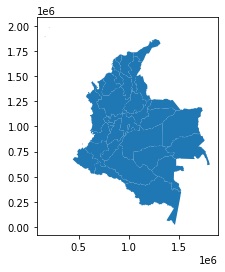

In [44]:
colombia.plot()

## Poligonos

<AxesSubplot:>

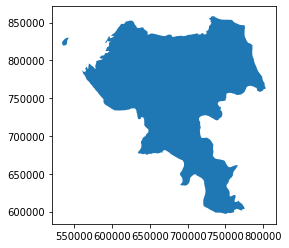

In [45]:
colombia[colombia["DPTO"]=="19"].plot()

In [46]:
### COLE_COD_DEPTO_UBICACION viene como número
datos['COLE_COD_DEPTO_UBICACION']=datos['COLE_COD_DEPTO_UBICACION'].astype(str)
datosDepto = datos.groupby('COLE_COD_DEPTO_UBICACION', as_index=False).size()
datosDepto

,COLE_COD_DEPTO_UBICACION,size
0,11,82832
1,13,25418
2,15,16737
3,17,10367
4,18,4669
5,19,13972
6,20,13270
7,23,19984
8,25,37049
9,27,4874


<AxesSubplot:>

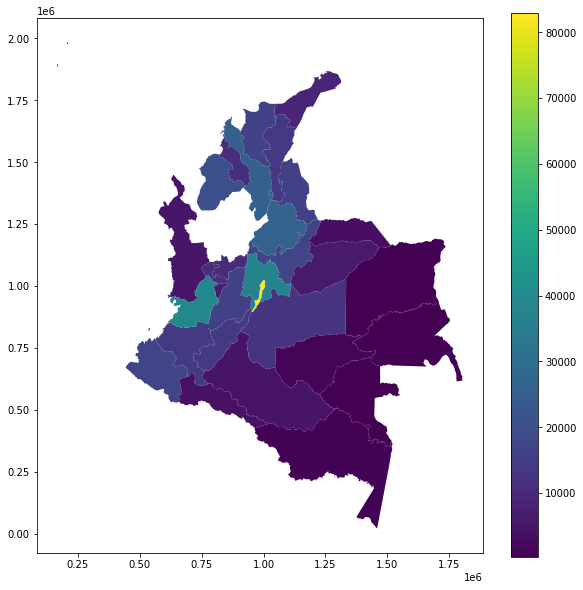

In [47]:
DeptoTamano = pd.merge(colombia, datosDepto, how="left", left_on="DPTO", right_on='COLE_COD_DEPTO_UBICACION')
DeptoTamano.plot(figsize=(10,10), column="size", legend=True)

In [48]:
colombia["DPTO"] = colombia["DPTO"].astype(int).astype(str)
colombia

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
0,5,ANTIOQUIA,6.335186e+10,1963728.843,6.335186e+06,"POLYGON ((754872.146 1445316.567, 755882.980 1..."
1,8,ATLANTICO,3.360765e+09,240936.172,3.360765e+05,"POLYGON ((913511.163 1637374.172, 912870.293 1..."
2,11,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,1.650948e+05,"POLYGON ((1006435.805 1021680.392, 1006048.264..."
3,13,BOLIVAR,2.614189e+10,1309427.968,2.614189e+06,"POLYGON ((881889.901 1644370.282, 882454.535 1..."
4,15,BOYACA,2.335258e+10,1364539.911,2.335258e+06,"POLYGON ((1206427.930 1268967.315, 1207191.680..."
5,17,CALDAS,7.558200e+09,603282.457,7.558200e+05,"POLYGON ((931978.603 1127612.742, 933119.333 1..."
6,18,CAQUETA,9.018087e+10,1888506.901,9.018087e+06,"POLYGON ((931968.406 767660.187, 932356.113 76..."
7,19,CAUCA,2.974279e+10,1243388.952,2.974279e+06,"MULTIPOLYGON (((540370.415 821285.843, 536207...."
8,20,CESAR,2.297310e+10,1080343.678,2.297310e+06,"POLYGON ((1087325.026 1692140.333, 1087516.283..."
9,23,CORDOBA,2.505949e+10,814093.372,2.505949e+06,"POLYGON ((809020.232 1533968.656, 810161.780 1..."


<AxesSubplot:>

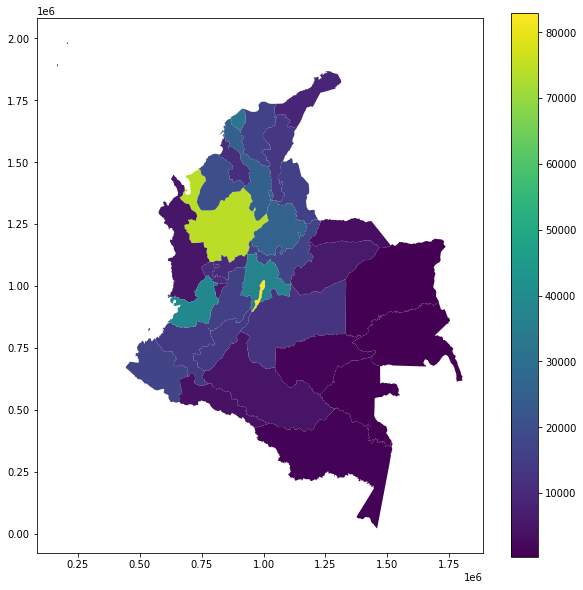

In [49]:
DeptoTamano = pd.merge(colombia, datosDepto, how="left", left_on="DPTO", right_on='COLE_COD_DEPTO_UBICACION')
DeptoTamano.plot(figsize=(10,10), column="size", legend=True)

In [50]:
datosDepto = datos.groupby('COLE_COD_DEPTO_UBICACION', as_index=False).mean()
datosDepto

,COLE_COD_DEPTO_UBICACION,PERIODO,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_MCPIO_UBICACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,...,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,11,20194.0,13.656124,11250.368112,162571.352400,2.019788e+11,2.014528e+11,11001.000000,11221.287751,11.215327,...,50.273831,59.898095,2.159902,54.134042,63.169415,265.804170,61.136554,56.282408,2.868493,2.957541
1,13,20194.0,17.100347,13372.831268,146346.345267,1.896129e+11,1.920408e+11,13221.168975,14616.914785,14.427964,...,42.249823,40.323196,1.657251,44.336769,40.197734,227.631836,39.220631,48.413384,2.194792,2.211976
2,15,20194.0,15.127920,15531.806895,137504.577583,1.914971e+11,1.939467e+11,15412.677601,16056.748820,15.683157,...,49.222740,57.555416,2.089861,50.789747,56.465018,261.786939,59.036267,49.116591,2.244812,2.264643
3,17,20194.0,17.067522,17350.326903,179525.914247,1.650831e+11,1.651796e+11,17287.313302,17430.069451,17.223305,...,46.317739,50.532169,1.899489,48.405807,50.445741,246.045722,49.911643,49.273597,2.268056,2.308286
4,18,20194.0,18.002356,18243.840651,197677.613622,2.133140e+11,2.281720e+11,18223.123581,18343.039623,18.126365,...,43.830585,44.699507,1.746841,44.370101,40.747698,233.068751,42.687728,45.467513,1.937417,2.001285
5,19,20194.0,19.191837,19542.918224,138910.628972,1.958600e+11,1.962607e+11,19348.258374,20221.534354,19.894646,...,42.654666,41.677498,1.678858,43.423259,38.373032,228.079946,39.744554,43.944981,1.821978,1.728725
6,20,20194.0,20.039270,20197.921685,182120.029088,1.800598e+11,1.802704e+11,20155.808892,20634.913489,20.507460,...,44.424491,45.811605,1.780708,46.418237,45.360739,238.440392,45.440166,48.199546,2.173597,2.180030
7,23,20194.0,23.092188,23451.698464,195908.672538,1.931706e+11,1.933960e+11,23360.289732,23559.259157,23.226081,...,43.645166,43.790232,1.731585,45.470550,43.053593,235.678393,43.703198,45.694919,1.956888,1.953160
8,25,20194.0,24.490093,24981.312439,232455.583336,2.214538e+11,2.218560e+11,25510.343086,24945.402764,24.490270,...,47.788118,54.185808,1.997031,50.441415,55.233825,254.514589,55.022835,51.822036,2.490594,2.492240
9,27,20194.0,27.011081,27248.292428,230497.111613,1.993419e+11,1.995881e+11,27227.104637,28627.205170,28.414034,...,37.530160,28.959376,1.382643,39.479073,28.693681,200.730817,24.581042,45.768639,1.974081,1.995486


<AxesSubplot:>

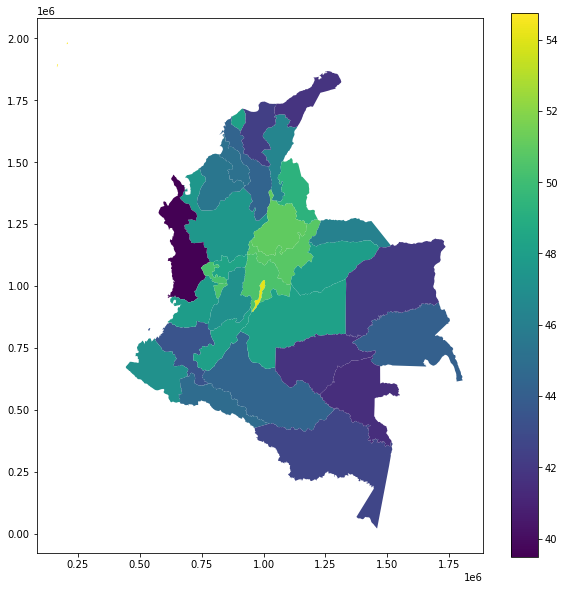

In [ ]:
DeptoTamano = pd.merge(colombia, datosDepto[['COLE_COD_DEPTO_UBICACION',"PUNT_INGLES"]],
                       how="left", left_on="DPTO", right_on='COLE_COD_DEPTO_UBICACION')
DeptoTamano.plot(figsize=(10,10), column="PUNT_INGLES", legend=True)

## Por municipios

In [51]:
colombiaMun = gpd.read_file("/content/drive/MyDrive/2023/Fundamentos de Estadistica/Hojas de datos/mpio.zip")
colombiaMun

,AREA,PERIMETER,WCOLGEN02_,WCOLGEN021,DPTO,NOMBRE_DPT,MPIO,NOMBRE_MPI,NOMBRE_CAB,CLASEMUN,MPIOS,ZONA,OF_REG,REG_ZONAS,HECTARES,geometry
0,7.516766e+09,475636.130236,2,566,44,LA GUAJIRA,847,URIBIA,URIBIA,CM,44847,ZONA06,DABAR,DABARZONA06,751676.579,"POLYGON ((1290154.980 1796649.425, 1270385.550..."
1,1.624663e+09,195961.387498,5,564,44,LA GUAJIRA,560,MANAURE,MANAURE,CM,44560,ZONA06,DABAR,DABARZONA06,162466.283,"POLYGON ((1187687.339 1800431.820, 1188158.788..."
2,1.779934e+09,272174.538806,6,563,44,LA GUAJIRA,430,MAICAO,MAICAO,CM,44430,ZONA06,DABAR,DABARZONA06,177993.385,"POLYGON ((1198031.055 1767210.476, 1212713.613..."
3,3.109950e+09,267346.564817,7,559,44,LA GUAJIRA,001,RIOHACHA,RIOHACHA,CM,44001,ZONA06,DABAR,DABARZONA06,310995.043,"POLYGON ((1156062.702 1755981.216, 1159630.667..."
4,1.999866e+09,198794.872346,8,1052,44,LA GUAJIRA,090,DIBULLA,DIBULLA,CM,44090,ZONA06,DABAR,DABARZONA06,199986.641,"POLYGON ((1095571.713 1750924.096, 1097255.333..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1.333941e+09,211788.556842,1122,361,05,ANTIOQUIA,480,MUTATA,MUTATA,CM,05480,ZONA02,DAMED,DAMEDZONA02,133394.129,"POLYGON ((704986.838 1318357.371, 716584.555 1..."
1118,2.816016e+09,359760.445480,1123,287,27,CHOCO,150,CARMEN DEL DARIEN,CARMEN DEL DARIEN,CM,27150,ZONA02,DAMED,DAMEDZONA02,281601.625,"POLYGON ((689343.717 1293927.217, 689505.362 1..."
1119,2.727328e+07,40602.945357,4,994,88,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...,001,SAN ANDRES,SAN ANDRES,CM,88001,ZONA08,DABAR,DABARZONA08,2727.328,"POLYGON ((168440.793 1896450.410, 168454.340 1..."
1120,1.293062e+06,5955.813895,1098,995,88,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...,564,SANTA CATALINA,SANTA CATALINA,CM,88000,ZONA08,DABAR,DABARZONA08,129.306,"POLYGON ((208230.889 1983876.766, 208230.084 1..."


In [52]:
datos['COLE_COD_MCPIO_UBICACION']=datos['COLE_COD_MCPIO_UBICACION'].astype(str)
#colombiaMun["MPIO"] = colombiaMun["MPIO"].astype(int).astype(str)

In [53]:
datosMcpio = datos.groupby('COLE_COD_MCPIO_UBICACION', as_index=False).mean()
datosMcpio

,COLE_COD_MCPIO_UBICACION,PERIODO,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,...,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,11001,20194.0,13.656124,11250.368112,162571.352400,2.019788e+11,2.014528e+11,11221.287751,11.215327,55.586802,...,50.273831,59.898095,2.159902,54.134042,63.169415,265.804170,61.136554,56.282408,2.868493,2.957541
1,13001,20194.0,20.454728,13012.666741,147287.044653,1.958023e+11,1.959437e+11,13047.232790,13.044430,50.643745,...,43.883903,44.225646,1.762149,46.984446,46.585026,236.142219,44.082608,51.267639,2.449662,2.433802
2,13006,20194.0,15.806818,15825.571970,121414.136364,1.766424e+11,1.766424e+11,13223.511364,13.215909,45.030303,...,38.477273,31.443182,1.416667,39.223485,28.257576,208.393939,28.087121,42.837088,1.702703,1.681818
3,13030,20194.0,13.000000,13030.000000,114791.855556,2.130740e+11,2.130740e+11,47245.000000,47.000000,42.155556,...,35.866667,25.088889,1.288889,34.822222,17.444444,194.466667,19.855556,44.423130,1.850575,2.000000
4,13042,20194.0,13.000000,13052.923077,270839.500000,1.346733e+11,1.346733e+11,13042.000000,13.000000,44.846154,...,38.476923,30.876923,1.376923,38.792308,26.192308,205.576923,26.030769,41.142154,1.527132,1.215385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,97511,20194.0,97.000000,97256.000000,630868.800000,2.970010e+11,2.970010e+11,97511.000000,97.000000,42.000000,...,33.400000,19.600000,1.100000,40.200000,29.100000,199.000000,21.600000,29.650121,1.000000,1.000000
1109,99001,20194.0,99.000000,99001.000000,100678.029703,2.663277e+11,2.663277e+11,99001.000000,99.000000,49.519802,...,44.564356,46.762376,1.792079,42.905941,37.143564,232.450495,42.767327,45.931912,1.989848,2.000000
1110,99524,20194.0,99.000000,99526.327103,582508.644860,2.852478e+11,2.852478e+11,99524.000000,99.000000,51.009346,...,45.112150,47.663551,1.794393,43.616822,39.280374,239.747664,46.691589,44.085620,1.831776,1.803738
1111,99624,20194.0,99.000000,99624.000000,317838.425000,2.992856e+11,2.992856e+11,99624.000000,99.000000,46.675000,...,43.050000,42.875000,1.675000,42.050000,33.800000,224.400000,37.375000,39.596763,1.447368,1.575000


<AxesSubplot:>

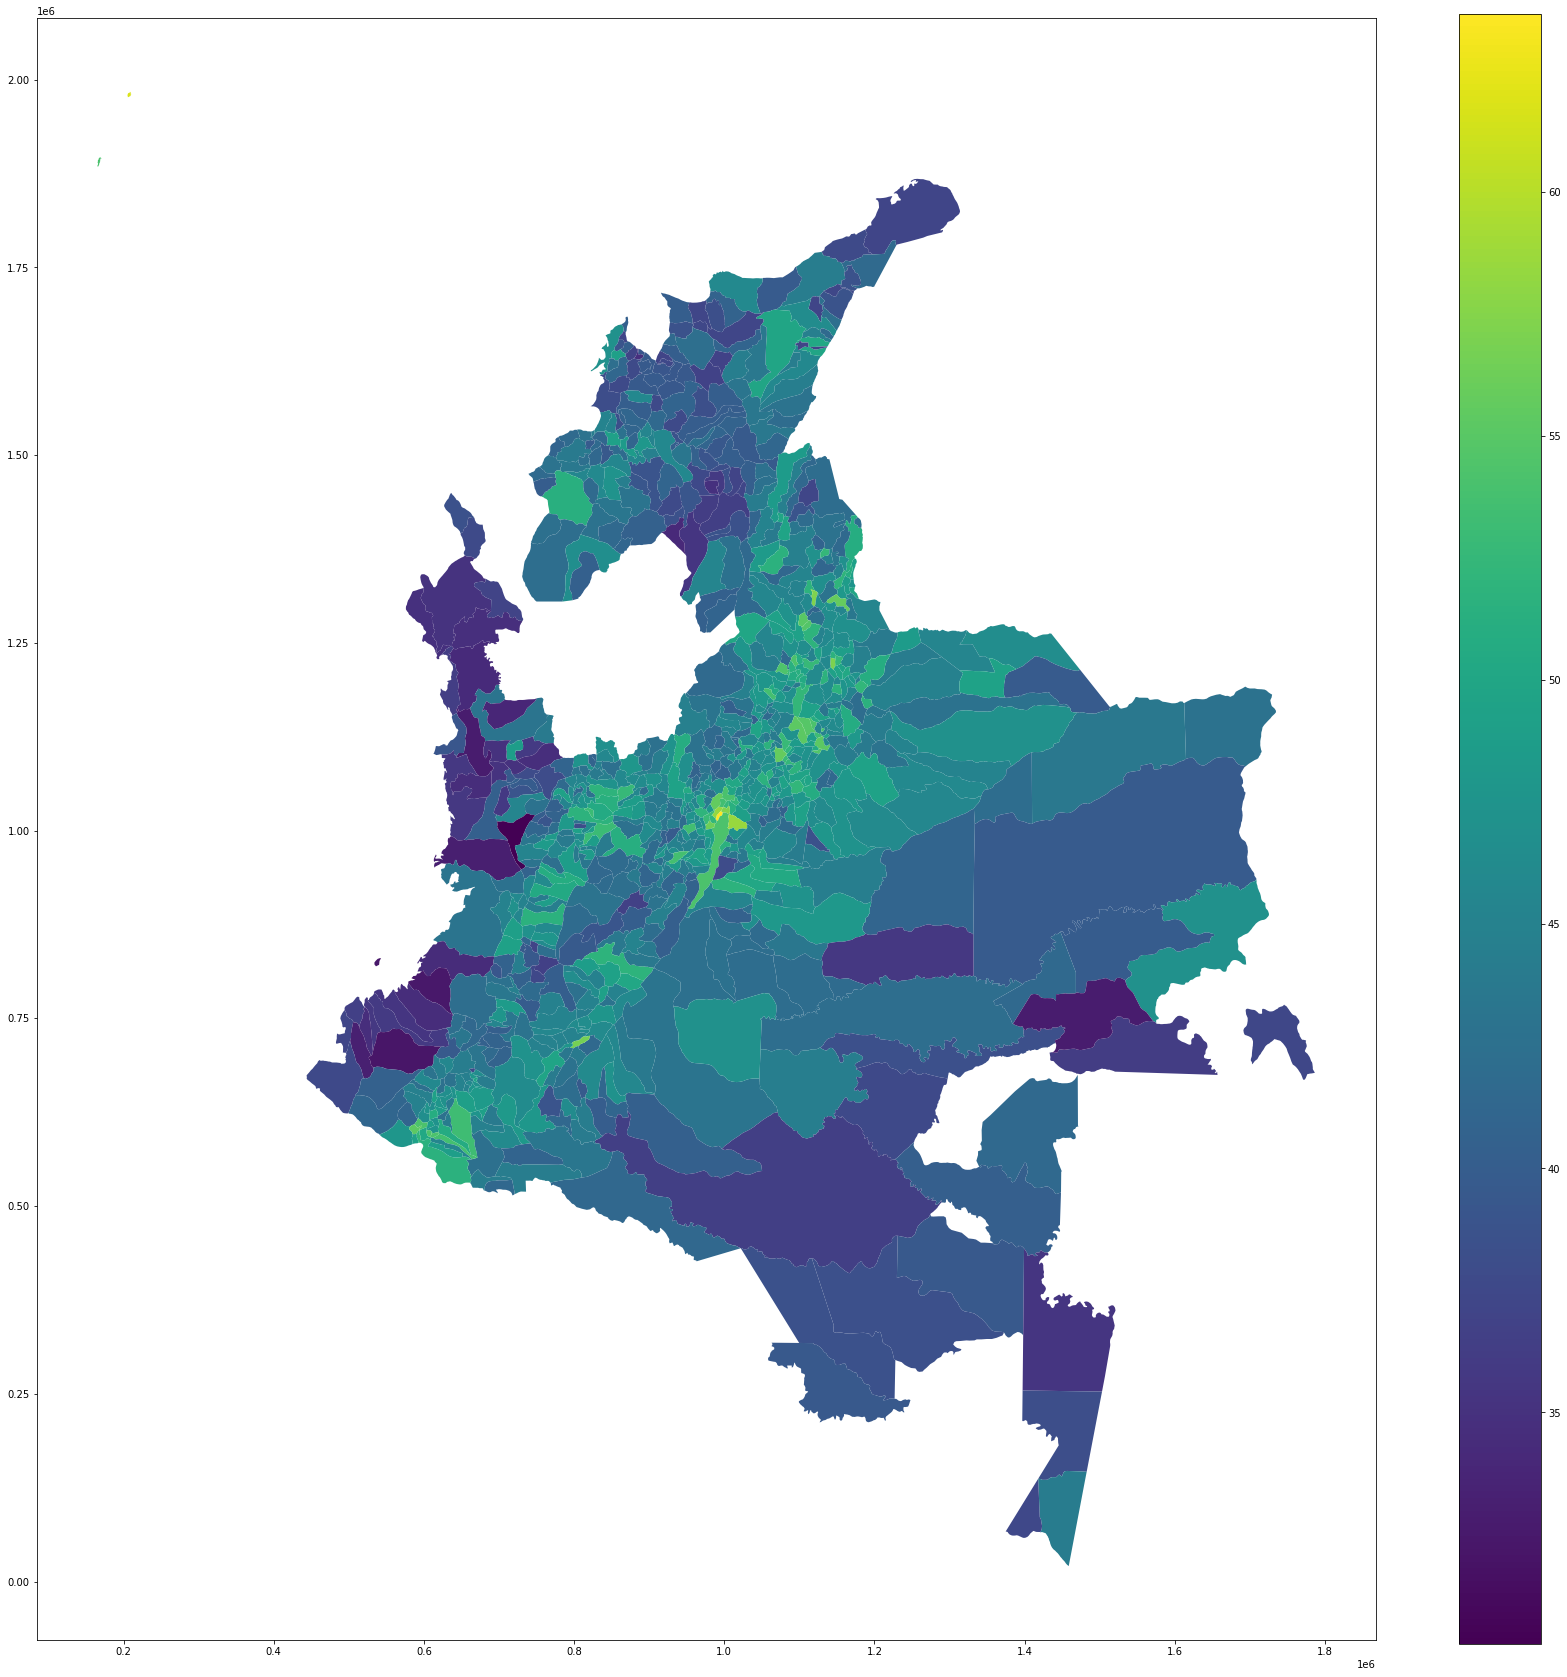

In [55]:
McpioMedias = pd.merge(colombiaMun, datosMcpio[['COLE_COD_MCPIO_UBICACION',"PUNT_INGLES"]],
                       how="left", left_on="MPIOS", right_on='COLE_COD_MCPIO_UBICACION')
McpioMedias.plot(figsize=(30,30), column="PUNT_INGLES", legend=True)

In [ ]:
McpioMedias

,AREA,PERIMETER,WCOLGEN02_,WCOLGEN021,DPTO,NOMBRE_DPT,MPIO,NOMBRE_MPI,NOMBRE_CAB,CLASEMUN,MPIOS,ZONA,OF_REG,REG_ZONAS,HECTARES,geometry,COLE_COD_MCPIO_UBICACION,PUNT_INGLES
0,7.516766e+09,475636.130236,2,566,44,LA GUAJIRA,847,URIBIA,URIBIA,CM,44847,ZONA06,DABAR,DABARZONA06,751676.579,"POLYGON ((1290154.980 1796649.425, 1270385.550...",NaN,NaN
1,1.624663e+09,195961.387498,5,564,44,LA GUAJIRA,560,MANAURE,MANAURE,CM,44560,ZONA06,DABAR,DABARZONA06,162466.283,"POLYGON ((1187687.339 1800431.820, 1188158.788...",NaN,NaN
2,1.779934e+09,272174.538806,6,563,44,LA GUAJIRA,430,MAICAO,MAICAO,CM,44430,ZONA06,DABAR,DABARZONA06,177993.385,"POLYGON ((1198031.055 1767210.476, 1212713.613...",NaN,NaN
3,3.109950e+09,267346.564817,7,559,44,LA GUAJIRA,1,RIOHACHA,RIOHACHA,CM,44001,ZONA06,DABAR,DABARZONA06,310995.043,"POLYGON ((1156062.702 1755981.216, 1159630.667...",NaN,NaN
4,1.999866e+09,198794.872346,8,1052,44,LA GUAJIRA,90,DIBULLA,DIBULLA,CM,44090,ZONA06,DABAR,DABARZONA06,199986.641,"POLYGON ((1095571.713 1750924.096, 1097255.333...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1.333941e+09,211788.556842,1122,361,5,ANTIOQUIA,480,MUTATA,MUTATA,CM,05480,ZONA02,DAMED,DAMEDZONA02,133394.129,"POLYGON ((704986.838 1318357.371, 716584.555 1...",NaN,NaN
1118,2.816016e+09,359760.445480,1123,287,27,CHOCO,150,CARMEN DEL DARIEN,CARMEN DEL DARIEN,CM,27150,ZONA02,DAMED,DAMEDZONA02,281601.625,"POLYGON ((689343.717 1293927.217, 689505.362 1...",NaN,NaN
1119,2.727328e+07,40602.945357,4,994,88,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...,1,SAN ANDRES,SAN ANDRES,CM,88001,ZONA08,DABAR,DABARZONA08,2727.328,"POLYGON ((168440.793 1896450.410, 168454.340 1...",NaN,NaN
1120,1.293062e+06,5955.813895,1098,995,88,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...,564,SANTA CATALINA,SANTA CATALINA,CM,88000,ZONA08,DABAR,DABARZONA08,129.306,"POLYGON ((208230.889 1983876.766, 208230.084 1...",NaN,NaN


In [ ]:
datos = pd.read_excel("/content/Base_siniestros_viales_consolidados_bogota_dc.xlsx", sheet_name=None)
datos

In [ ]:
datosSiniestros = datos["SINIESTROS"]

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR
0,4401438,01/01/2015,01:05:00,2,2,NaN,NaN,KR 64A-CL 2C 02,16,2
1,4401449,01/01/2015,05:50:00,2,3,NaN,NaN,AV AVENIDA DEL SUR-KR 65A 41,7,1
2,4401430,01/01/2015,07:15:00,2,3,NaN,NaN,KR 19D-CL 62 S 02,19,1
3,4401453,01/01/2015,09:30:00,3,1,1.0,NaN,KR 79-CL 42F S 71,8,1
4,4401423,01/01/2015,09:45:00,2,1,1.0,NaN,CL 66A-KR 76 02,10,2
...,...,...,...,...,...,...,...,...,...,...
196147,10530481,31/12/2020,21:20:00,3,1,1.0,NaN,CL 42-KR 86 S 02,8,1
196148,10530439,31/12/2020,21:30:00,2,1,1.0,NaN,KR 111-CL 171 02,11,2
196149,10530491,31/12/2020,21:34:00,3,1,1.0,NaN,CL 134-KR 5 08,1,1
196150,10531380,31/12/2020,21:40:00,2,1,1.0,NaN,CL 142 - KR 146 02,11,1


In [ ]:
datosDiccionario = datos["DICCIONARIO"]
datosDiccionario

,HOJA,CAMPO,CODIGO,DESCRIPCION
0,SINIESTROS,GRAVEDAD,1,Con Muertos
1,SINIESTROS,GRAVEDAD,2,Con Heridos
2,SINIESTROS,GRAVEDAD,3,Solo Daños
3,SINIESTROS,CLASE,7,Autolesion
4,SINIESTROS,CLASE,1,Choque
...,...,...,...,...
206,HIPOTESIS,CODIGO_CAUSA,502,Descender o subir del vehículo en marcha (pasa...
207,HIPOTESIS,CODIGO_CAUSA,503,Pasajero embriagado (pasajero o acompañante)
208,HIPOTESIS,CODIGO_CAUSA,504,Viajar a la izquierda del conductor (pasajero ...
209,HIPOTESIS,CODIGO_CAUSA,505,Niños en asiento delantero (pasajero o acompañ...


In [ ]:
clave = datosDiccionario[datosDiccionario["CAMPO"]=="CLASE"][datosDiccionario["HOJA"]=="SINIESTROS"]
clave

<ipython-input-51-2016499a371b>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,HOJA,CAMPO,CODIGO,DESCRIPCION
3,SINIESTROS,CLASE,7,Autolesion
4,SINIESTROS,CLASE,1,Choque
5,SINIESTROS,CLASE,2,Atropello
6,SINIESTROS,CLASE,4,Caida de ocupante
7,SINIESTROS,CLASE,3,Volcamiento
8,SINIESTROS,CLASE,6,Otro
9,SINIESTROS,CLASE,5,Incendio


In [ ]:
datosSiniestros1 = pd.merge(datosSiniestros, clave[["CODIGO", "DESCRIPCION"]], how="left", left_on="CLASE", right_on="CODIGO")
datosSiniestros1

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,CODIGO,DESCRIPCION
0,4401438,01/01/2015,01:05:00,2,2,NaN,NaN,KR 64A-CL 2C 02,16,2,2,Atropello
1,4401449,01/01/2015,05:50:00,2,3,NaN,NaN,AV AVENIDA DEL SUR-KR 65A 41,7,1,3,Volcamiento
2,4401430,01/01/2015,07:15:00,2,3,NaN,NaN,KR 19D-CL 62 S 02,19,1,3,Volcamiento
3,4401453,01/01/2015,09:30:00,3,1,1.0,NaN,KR 79-CL 42F S 71,8,1,1,Choque
4,4401423,01/01/2015,09:45:00,2,1,1.0,NaN,CL 66A-KR 76 02,10,2,1,Choque
...,...,...,...,...,...,...,...,...,...,...,...,...
196147,10530481,31/12/2020,21:20:00,3,1,1.0,NaN,CL 42-KR 86 S 02,8,1,1,Choque
196148,10530439,31/12/2020,21:30:00,2,1,1.0,NaN,KR 111-CL 171 02,11,2,1,Choque
196149,10530491,31/12/2020,21:34:00,3,1,1.0,NaN,CL 134-KR 5 08,1,1,1,Choque
196150,10531380,31/12/2020,21:40:00,2,1,1.0,NaN,CL 142 - KR 146 02,11,1,1,Choque
